<h1>Linear Regression</h1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<h2>Creating Simple Random Dataset




In [ ]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

print(X[::10])
print(Y[::10])

[[1.09762701]
 [1.58345008]
 [1.95723668]
 [0.52911122]
 [0.7190158 ]
 [1.14039354]
 [0.31793917]
 [1.95291893]
 [0.63596636]
 [0.6371379 ]]
[[ 6.12773118]
 [ 8.34717328]
 [11.75486075]
 [ 7.45489263]
 [ 6.53347293]
 [ 6.65126455]
 [ 3.46255991]
 [ 9.79051518]
 [ 5.40986663]
 [ 6.83227254]]


<h2>Plot the Relation of these variable</h2>

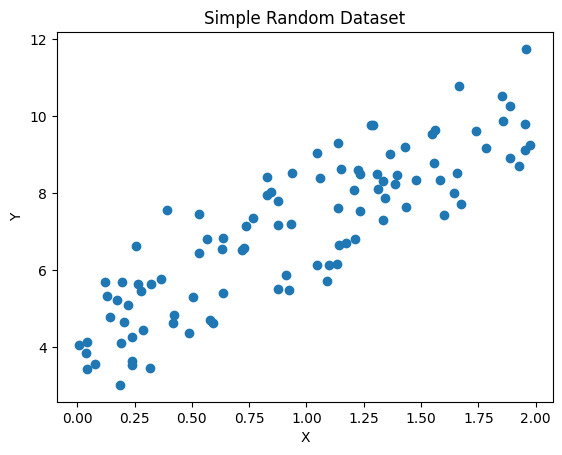

In [ ]:
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Random Dataset")
plt.show()

<h2>Convert to DataFrame</h2>

In [ ]:
df = pd.DataFrame(np.hstack((X, Y)), columns=['X', 'Y'])
df.head()

,X,Y
0,1.097627,6.127731
1,1.430379,9.191963
2,1.205527,8.082243
3,1.089766,5.733055
4,0.847310,8.030181


<h2>Data Preparation</h2>

In [ ]:
np.random.seed(4)
msk = np.random.rand(len(X)) < 0.8
X_train = X[msk]
Y_train = Y[msk]
X_test = X[~msk]
Y_test = Y[~msk]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80, 1)
(80, 1)
(20, 1)
(20, 1)


<h2>Model and its Parameters</h2>

$$ F_{w,b}(X) = wX + b $$

<h4>where:</h4>

* $F_{w,b}(X)$ : Prediction function
* $w$ : Weight (coefficient)
* $X$ : Input feature
* $b$ : Bias (intercept)


In [ ]:
w, b = 0, 0

def predict(X, w, b):
    return w * X + b

<h2>Cost Functions</h2>

- <h3>Mean Squared Error</h3>

$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 $$

<h4>where:</h4>

* $J(w,b)$ : Cost function that measures the error between predictions and actual values
* $m$ : Total number of training examples
* $\hat{y}^{(i)}$ : Predicted value for the i-th training example
* $y^{(i)}$ : Actual value for the i-th training example
* $\frac{1}{2m}$ : Scaling factor that computes the average and makes derivatives cleaner
* $(\hat{y}^{(i)} - y^{(i)})^2$ : Squared difference between predicted and actual values

In [ ]:
def compute_cost(Y, predictions):
    m = Y.shape[0]
    cost = (1 / m) * np.sum((predictions - Y) ** 2)
    # cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost


- <h3>Mean Absolute Error</h3>

$$ J(w,b) = \frac{1}{m} \sum_{i=1}^m |\hat{y}^{(i)} - y^{(i)}| $$

<h4>where:</h4>

* $J(w,b)$ : Cost function that measures the error between predictions and actual values
* $m$ : Total number of training examples
* $\hat{y}^{(i)}$ : Predicted value for the i-th training example
* $y^{(i)}$ : Actual value for the i-th training example
* $\frac{1}{m}$ : Scaling factor that computes the average
* $|{y}^{(i)} - y^{(i)}|$ : Absolute difference between predicted and actual values

In [ ]:
def mae_cost(Y, predictions):
    m = Y.shape[0];
    cost = (1 / m) * np.sum(np.abs(predictions - Y))
    return cost

- <h3>R² Score</h3>

$$ R^2 = 1 - \frac{\sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2}{\sum_{i=1}^{m} (y^{(i)} - \bar{y})^2} $$

<h4>where:</h4>

* $R^2$ : Coefficient of determination, measures the proportion of variance explained by the model
* $m$ : Total number of training examples
* $\hat{y}^{(i)}$ : Predicted value for the i-th training example
* $y^{(i)}$ : Actual value for the i-th training example
* $\bar{y}$ : Mean of the actual values, $\bar{y} = \frac{1}{m} \sum_{i=1}^{m} y^{(i)}$
* $(\hat{y}^{(i)} - y^{(i)})^2$ : Squared residuals, the difference between predicted and actual values
* $(y^{(i)} - \bar{y})^2$ : Total sum of squares, the variance of the actual values


In [ ]:
def r2_cost(Y, predictions):
    mean_y = np.mean(Y)
    variance = np.sum((Y - mean_y) ** 2)
    residuals = np.sum((Y - predictions) ** 2)
    r2 = 1 - (residuals / variance)
    return r2

<h2>Implement Gradient Descent</h2>

$$ w := w - \alpha \frac{\partial J(w,b)}{\partial w}, \quad b := b - \alpha \frac{\partial J(w,b)}{\partial b} $$

<h4>where:</h4>

* $w$ : Weight (coefficient) that is being optimized
* $b$ : Bias (intercept) that is being optimized
* $\alpha$ : Learning rate, controls the step size in each iteration
* $J(w,b)$ : Cost function, typically Mean Squared Error (MSE), given by:
  $$
  J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
  $$
* $\frac{\partial J(w,b)}{\partial w}$ : Partial derivative of the cost function with respect to $w$, given by:
  $$
  \frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) X^{(i)}
  $$
* $\frac{\partial J(w,b)}{\partial b}$ : Partial derivative of the cost function with respect to $b$, given by:
  $$
  \frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
  $$

In these equations:
- $\hat{y}^{(i)} = w X^{(i)} + b$ is the predicted value for the $i$-th training example.
- $y^{(i)}$ is the actual value for the $i$-th training example.
- $X^{(i)}$ is the input feature for the $i$-th training example.
- $m$ is the total number of training examples.

The update rules use the gradients of the cost function with respect to \( w \) and \( b \) to iteratively improve the values of \( w \) and \( b \) by moving in the opposite direction of the gradient, scaled by the learning rate \( \alpha \).


In [ ]:
def gradient_descent(X, Y, w, b, learning_rate, iterations):
    m = X.shape[0]
    for i in range(iterations):
        predictions = predict(X, w, b)
        # Calculate gradient
        dw = (1 / m) * np.sum((predictions - Y) * X)
        db = (1 / m) * np.sum(predictions - Y)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {compute_cost(Y, predictions)}")

    return w, b


<h2>Setting Hyperparameters and Training</>

In [ ]:
#set hyperparameters
learning_rate = 0.1
iterations = 1000

#train model
w, b = gradient_descent(X_train, Y_train, w, b, learning_rate, iterations)

#print final parameters
print(f"Final parameters: w = {w}, b = {b}")

Iteration 0: Cost 51.24724146817039
Iteration 100: Cost 0.9602020770824201
Iteration 200: Cost 0.953492983026531
Iteration 300: Cost 0.9532921056852359
Iteration 400: Cost 0.9532860912060965
Iteration 500: Cost 0.9532859111262572
Iteration 600: Cost 0.9532859057344771
Iteration 700: Cost 0.9532859055730416
Iteration 800: Cost 0.953285905568208
Iteration 900: Cost 0.9532859055680633
Final parameters: w = 2.925230438641555, b = 4.24147247281325


<h2>Plot Predictions</>

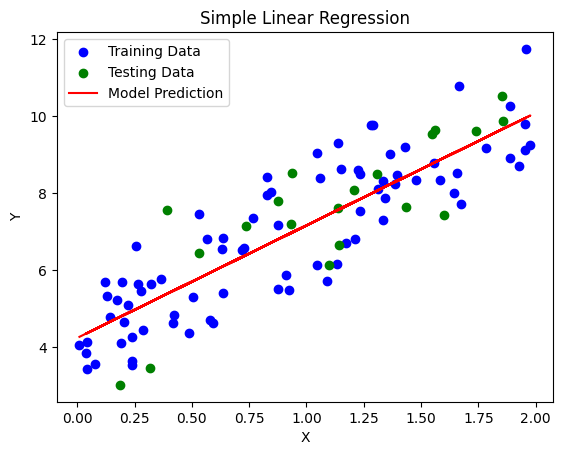

In [ ]:
plt.scatter(X_train, Y_train, color = 'blue', label = 'Training Data')
plt.scatter(X_test, Y_test, color = 'green', label = 'Testing Data')
plt.plot(X, predict(X, w, b), 'r-', label = 'Model Prediction')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()


<h2>Model Evaluation</>

In [ ]:
predictions = predict(X_test, w, b)

mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(Y_test, predictions)
print(f"R-squared: {r2}")

Mean Squared Error: 1.1544821311788458
Mean Absolute Error: 0.9065086155317239
R-squared: 0.6738188137446567


<h2>Model Evaluation (Manual)</>

In [ ]:
predictions = predict(X_test, w, b)

mse = compute_cost(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

mae = mae_cost(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

r2 = r2_cost(Y_test, predictions)
print(f"R-squared: {r2}")

Mean Squared Error: 1.1544821311788458
Mean Absolute Error: 0.9065086155317239
R-squared: 0.6738188137446567


<h2>Residuals Plot</>

$$ residuals = \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) $$

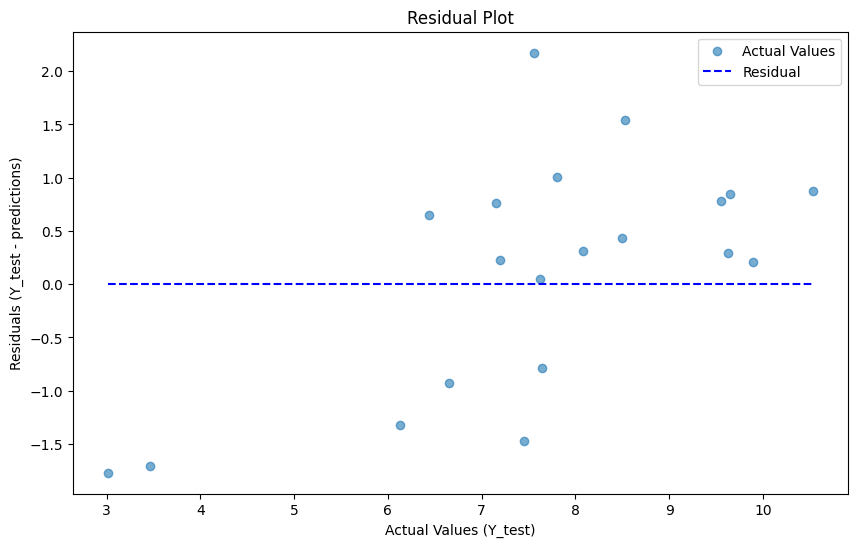

In [ ]:
residuals = Y_test - predictions

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, alpha = 0.6, label = 'Actual Values')
plt.hlines(0, Y_test.min(), Y_test.max(), colors='blue', linestyles='--', label = 'Residual')
plt.legend()
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Residuals (Y_test - predictions)")
plt.title("Residual Plot")
plt.show()

<h2>Using Sci-kitlearn Linear Model</h2>

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient: [[2.92523042]]
Intercept: [4.24147249]


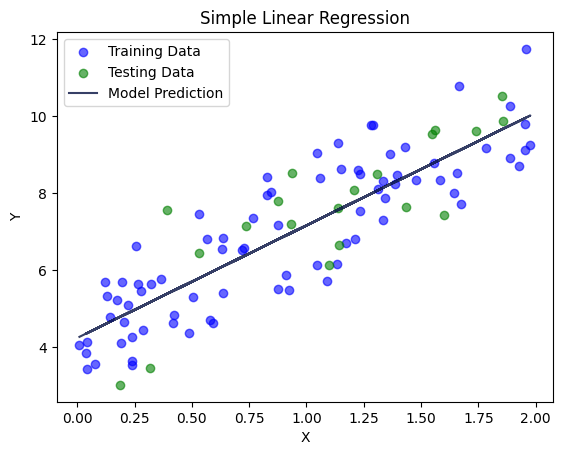

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X_train, Y_train, color = 'blue', alpha = 0.6, label = 'Training Data')
plt.scatter(X_test, Y_test, color = 'green', alpha = 0.6, label = 'Testing Data')
plt.plot(X, model.predict(X), '#030f40', alpha = 0.8, label = 'Model Prediction')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()

In [ ]:
predictions = model.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(Y_test, predictions)
print(f"R-squared: {r2}")

Mean Squared Error: 1.154482131178847
Mean Absolute Error: 0.9065086155317248
R-squared: 0.6738188137446564


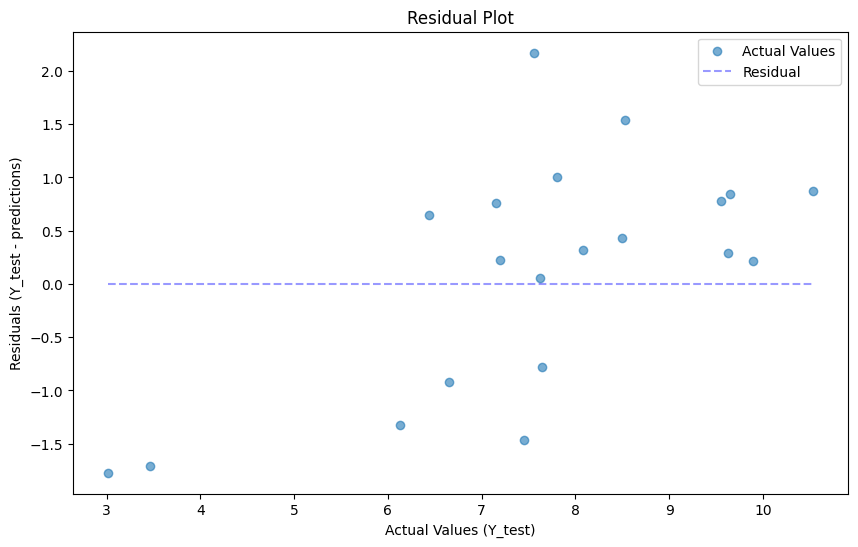

In [ ]:
residuals = Y_test - predictions

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, alpha = 0.6, label = 'Actual Values')
plt.hlines(0, Y_test.min(), Y_test.max(), colors='blue', linestyles='--', alpha = 0.4, label = 'Residual')
plt.legend()
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Residuals (Y_test - predictions)")
plt.title("Residual Plot")
plt.show()